In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [21]:
# Load Titanic dataset 
df = pd.read_csv('./data/exoplanets.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

In [22]:
# Determine columns to drop by number of null values
thresholdAmount = 0.15 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()

In [13]:
# covnert rastr and decstr to floats
def daysToSeconds(time):
    TIME_MAP = [('d', 86400), ('h', 3600), ('m', 60), ('s', 1)]
    res = 0.0
    isNegative = True if time[0] == "-" else False

    cur = time if not isNegative else time[1:]
    for (chr, multiplier) in TIME_MAP:
        cur_split = cur.split(chr)
        if(len(cur_split) > 1):
            res += (float(cur_split[0]) * multiplier)
            cur = cur_split[1]
    if isNegative:
        res *= -1
    return res

In [23]:
# Convert rastr and decstr to numbers (in seconds)
df['rastr'] = df['rastr'].apply(daysToSeconds)
df['decstr'] = df['decstr'].apply(daysToSeconds)

# Change sy_pynum to be 1 or more True if 1, False if more than 1
df['sy_pnum'] = df['sy_pnum'].apply(lambda x: x == 1)

In [24]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object').drop(columns=['pl_name', 'hostname'])
# df_num.info()
# df_obj.info()

# print(df_obj)
# df_obj = df

sy_pnum
True     1928
False    1694
Name: count, dtype: int64
sy_pnum
True     53.23026
False    46.76974
Name: count, dtype: float64


,discoverymethod_Eclipse Timing Variations,discoverymethod_Imaging,discoverymethod_Orbital Brightness Modulation,discoverymethod_Radial Velocity,discoverymethod_Transit,discoverymethod_Transit Timing Variations,disc_facility_Anglo-Australian Telescope,disc_facility_Apache Point Observatory,disc_facility_Bohyunsan Optical Astronomical Observatory,disc_facility_CHaracterising ExOPlanets Satellite (CHEOPS),...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
3,False,False,False,True,False,False,False,False,False,False,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
5,False,False,False,True,False,False,False,False,False,False,...,-2.59000,5.22606,0.023,-0.023,2.094,0.244,-0.244,4.75429,0.005055,-0.005055
9,False,False,False,True,False,False,False,False,False,False,...,-0.67280,6.45350,0.023,-0.023,4.285,0.016,-0.016,6.20374,0.000498,-0.000498
10,False,False,False,True,False,False,False,False,False,False,...,-0.67280,6.45350,0.023,-0.023,4.285,0.016,-0.016,6.20374,0.000498,-0.000498
25,False,False,False,True,False,False,False,False,False,False,...,-1.18605,4.58010,0.023,-0.023,1.734,0.218,-0.218,4.23773,0.004729,-0.004729


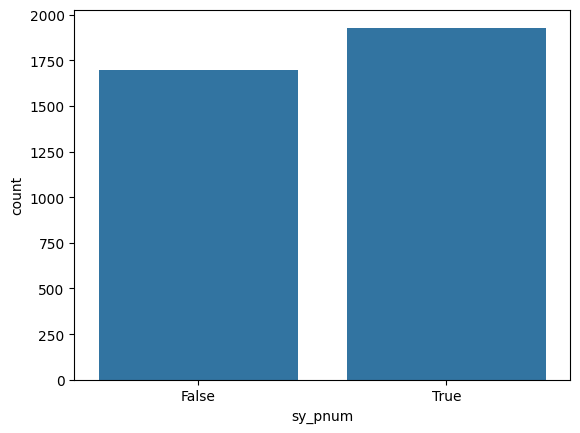

In [25]:
df_obj = pd.get_dummies(df_obj, drop_first=True)
df = df_obj.join(df_num)
print(df['sy_pnum'].value_counts())
print( (df['sy_pnum'].value_counts()/ df['sy_pnum'].value_counts().sum()) * 100)
sns.countplot(data=df, x='sy_pnum')
df.head()

In [27]:
attr = df.drop('sy_pnum', axis=1)
target = df['sy_pnum']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=30)

In [43]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.8215271389144434  

 Confusion Matrix:
[[378 106]
 [ 88 515]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.78      0.80       484
        True       0.83      0.85      0.84       603

    accuracy                           0.82      1087
   macro avg       0.82      0.82      0.82      1087
weighted avg       0.82      0.82      0.82      1087



In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);